In [1]:
import copy
import numpy as np
import matplotlib.pyplot as p
import astropy.units as u
import funcs
import pickle
import CBSearch
%matplotlib notebook
%load_ext autoreload
%autoreload 2

In [2]:
cbs = CBSearch.CBSearch(lcfilepath='Lightcurves/K38_clean_noecl.txt')
#Load lightcurve

#lc = np.genfromtxt('Lightcurves/K34_clean_noecl.txt')
#time = lc[:,0]+2454833
#flux = lc[:,1]
#err = lc[:,2]

Adding Kepler Time offset of 2454833.


<IPython.core.display.Javascript object>


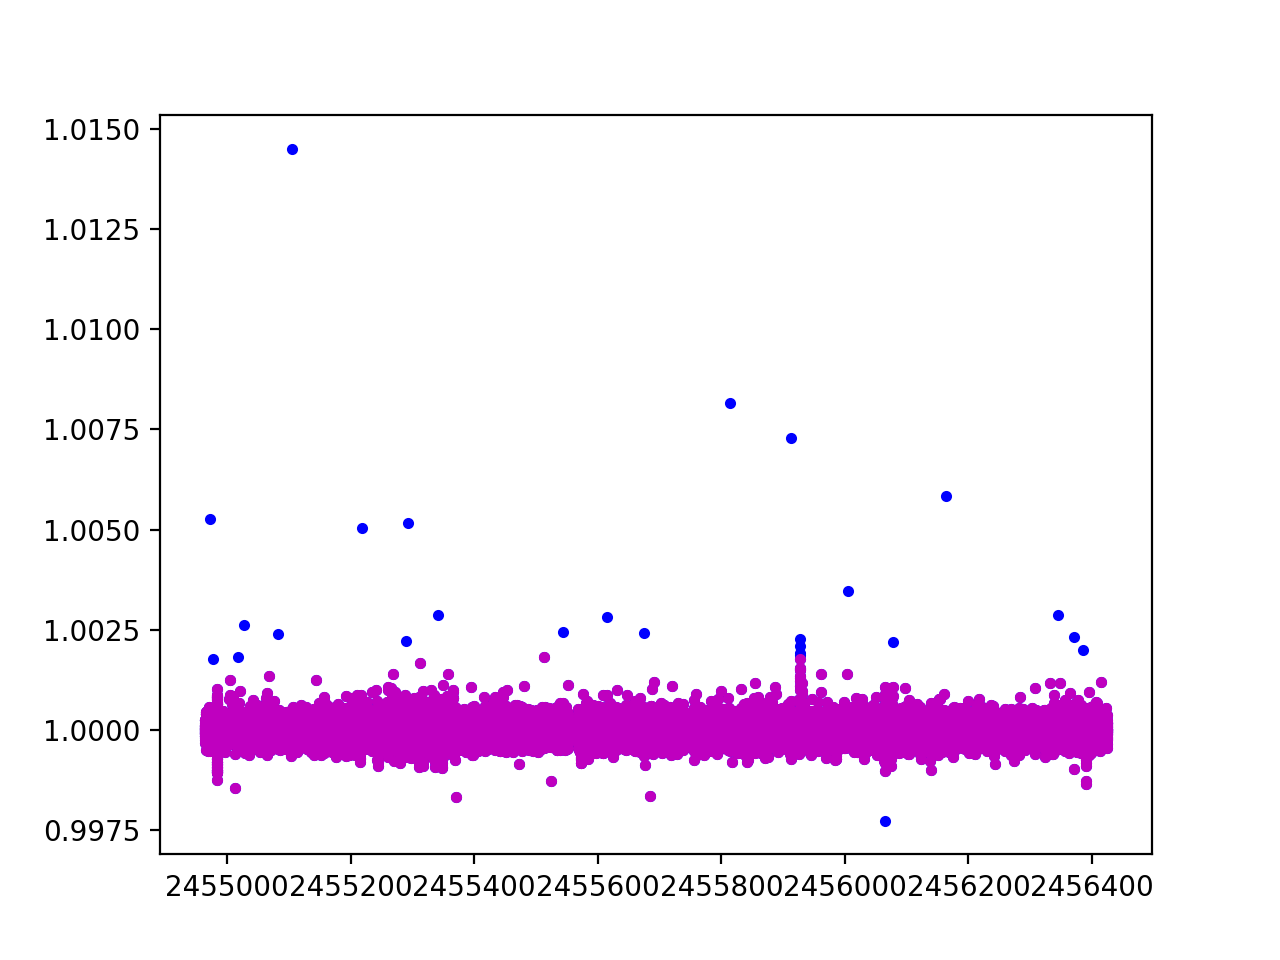

In [3]:
#try without K34b transits
#lc_notran = np.genfromtxt('Lightcurves/K34_cln_noecl_notran.txt')
#time_nt = lc_notran[:,0]
#flux_nt = lc_notran[:,1]
#err_nt = lc_notran[:,2]

p.figure()
p.plot(cbs.time,cbs.flux,'b.')
cbs.cut_outliers(thresh=15)
p.plot(cbs.time,cbs.flux,'m.')

#outlier cut
#cutidx = funcs.outlier_cut(time_nt,flux_nt,10, 250)
#time_nt_cut, flux_nt_cut = time_nt[cutidx],flux_nt[cutidx]
#time_nt_cut, flux_nt_cut = time_nt, flux_nt



In [6]:
# Kepler 38


cb = funcs.CBSystem(m1 = 0.949,f1 = 1., m2 = 0.2491, f2 = 0.0009081,
                     r1 = 1.757 * u.Rsun.to('au'), r2 = 0.27238 * u.Rsun.to('au'),
                     ab = 0.14694, eb = 0.1032, ib = np.deg2rad(89.446),
                     wb = np.deg2rad(268.68), fb = np.deg2rad(154.7856686),
                     mp = 0 * u.Mjup.to('Msun'), rp = 2.98 * u.Rearth.to('au'),
                     ap = 0.4644, ep = 0., ip = np.deg2rad(89.265),
                     wp = np.pi/2, fp = np.deg2rad(129.1698), Wp = np.deg2rad(0.1),
                     t0 = 2454970.0)

ab0 = cb.ab
mb0 = cb.m1 + cb.m2
p_p0 = (cb.ap**3/(cb.m1+cb.m2))**(1./2.)*365.25 #in days

fp0 = cb.fp
print(1/np.sqrt( (cb.m1+cb.m2)/cb.ab**3 )*365.25)
print(p_p0)

timing_precision = 30./86400./365.25 * (2*np.pi)  #in years/2pi

t = cbs.time


18.795493959724038
105.6043984677386


In [7]:
cbs.time[-1]-2455000

1424.001751112286

In [8]:
# make the reference stacked light curve set

#tts = funcs.reb_cb_c(cb,tmin=np.min(t),tmax=np.max(t))

tts,tds = funcs.reb_cb_dvm(cb,0,2,tmin=np.min(t),tmax=np.max(t), timing_precision=timing_precision)
    
ref_tts = tts[tds>0]
ref_tds = tds[tds>0]


In [9]:
cbs.load_nbody(fpath1='Nbody/k38-0-nbody.pkl')


In [10]:
cbs.drop_unstable()



In [11]:
print(len(cbs.tts_all[0].keys()))
#print(len(tts_all['130.0'].keys()))

3295


In [17]:
#cbs.drop_periods(ppcut=0.006)


In [12]:
cbs.make_lcstat()

#windows = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]
#minpoints = 3
#blurfactor = 1.0
#window lightcurve with duration
#lcstat_nt = {}
#blurlcstat_nt = {}
#for win in windows:
#    lcstat_nt[win], blurlcstat_nt[win] = funcs.running_mean_gaps(time_nt_cut,flux_nt_cut-1,win,minpoints,blurfactor)
    
#blurlcstat_nt_norm = funcs.normalise_stat(blurlcstat_nt,lcstat_nt,window=250)

Statisticking
Normalising


<IPython.core.display.Javascript object>


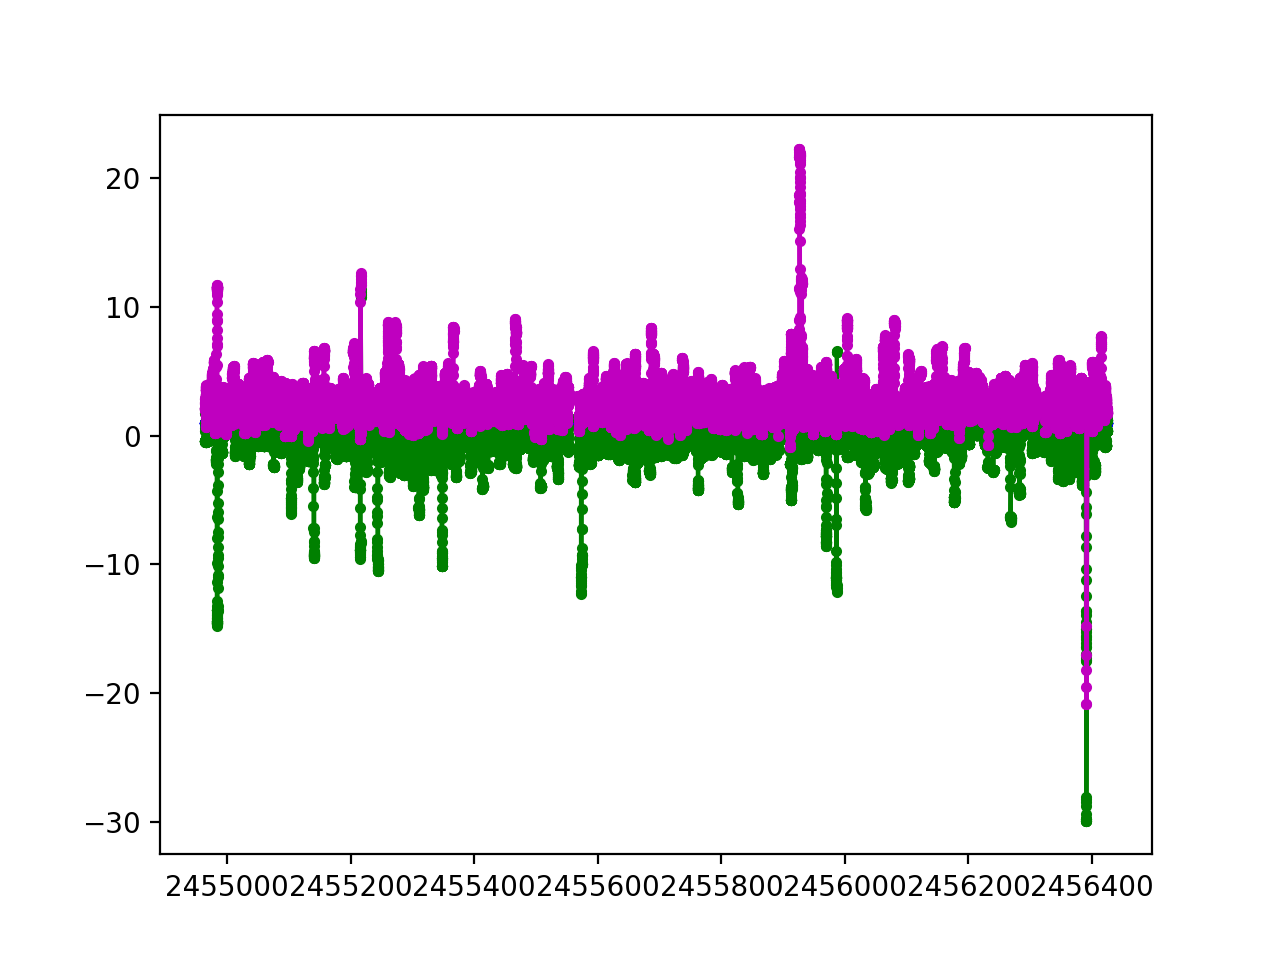

In [13]:
#for win in windows:
#    blurlcstat_nt_norm[win][blurlcstat_nt[win]>500] = 0.
#    blurlcstat_nt[win][blurlcstat_nt[win]>500] = 0.
#    lcstat_nt[win][lcstat_nt[win]>500] = 0.

p.figure()
p.plot(cbs.time,cbs.flux,'b.')
p.plot(cbs.time,cbs.blurlcstat_norm[0.3],'g.-')
p.plot(cbs.time,cbs.blurantistat_norm[0.3],'m.-')



In [56]:
#periodogram_nt = funcs.make_periodogram(tts_all,tds_all,time_nt_cut,ppset_keys,fpset_keys,windows,blurlcstat_nt_norm)
#periodogram_nt_pt = funcs.make_periodogram_pertransit(tts_all,tds_all,time_nt_cut,ppset_keys,fpset_keys,windows,blurlcstat_nt_norm)
#periodogram_nt_2 = funcs.make_periodogram(tts_all_2,tds_all_2,time_nt_cut,ppset_2_keys,fpset_2_keys,windows,blurlcstat_nt_norm)
#periodogram_nt_pt_2 = funcs.make_periodogram_pertransit(tts_all_2,tds_all_2,time_nt_cut,ppset_2_keys,fpset_2_keys,windows,blurlcstat_nt_norm)

In [14]:
#print(cbs.ppset_keys)
#print(cbs.tts_all[0].keys())
cbs.make_periodogram(prisec=False,pertransit=False, statistic=cbs.blurlcstat_norm)
#periodogram_nt_both = funcs.make_periodogram_prisec(tts_all,tts_all_2,tds_all,tds_all_2,time_nt_cut,ppset_keys,fpset_keys,windows,blurlcstat_nt_norm)

In [15]:
cbs.tds_all[0]['92.540']['1.3752']

KeyError: '92.540'

<IPython.core.display.Javascript object>


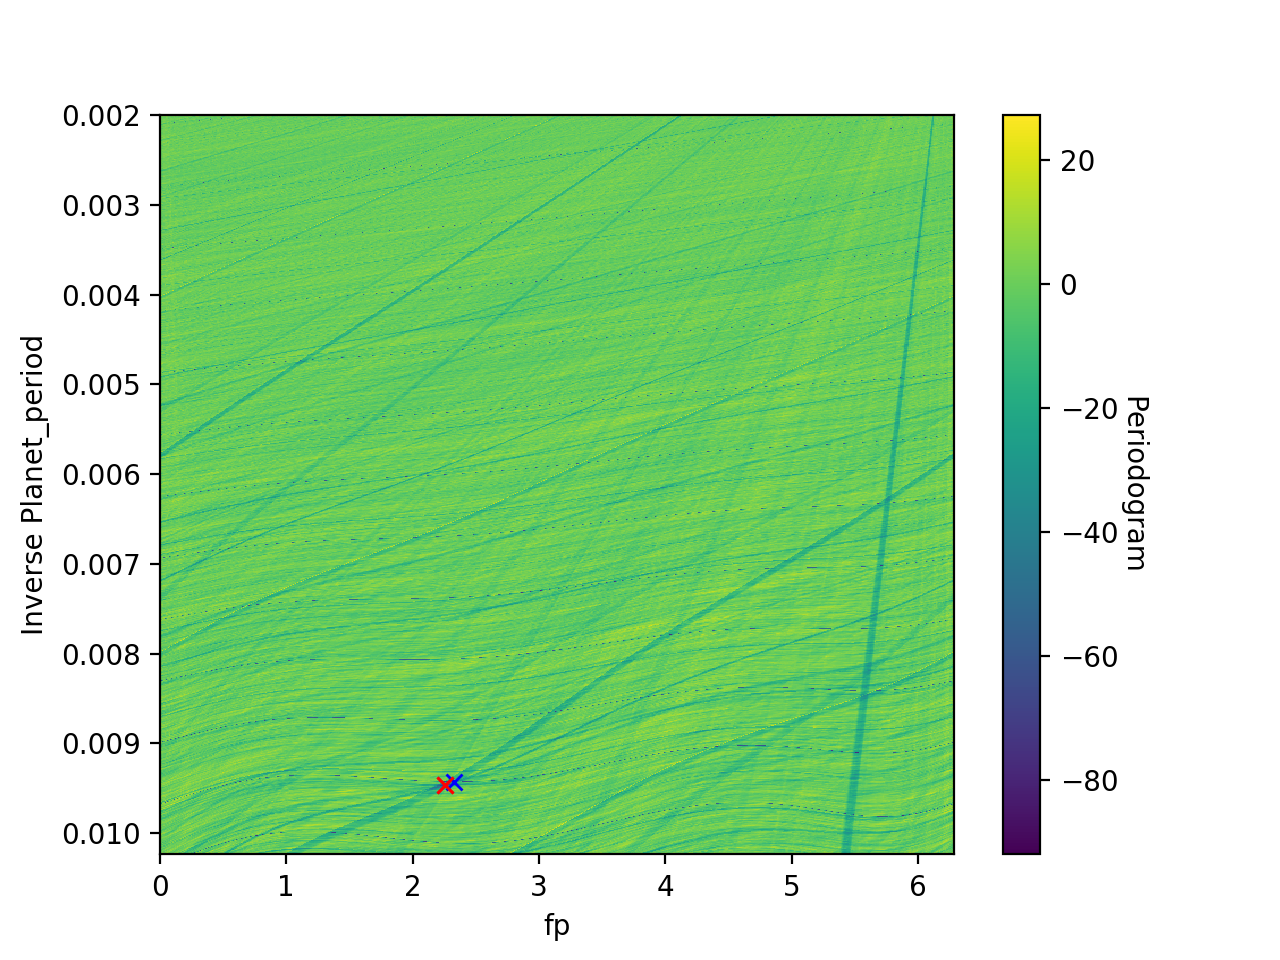

-91.92109464057718
-16.29838785949813


In [18]:
cbs.plot_static(fppp0=[fp0,p_p0])
p.plot(cb.fp,1./p_p0,'rx')
#p.figure()
#palette = p.cm.viridis
#p.imshow(periodogram_nt_both,origin='lower',
#         extent=[np.min(fpset),np.max(fpset),1./np.min(ppset),1./np.max(ppset)],
#         aspect='auto',cmap=palette)
#cbar = p.colorbar()
#cbar.set_label('Periodogram_prisec', rotation=270, labelpad=10)
#p.ylabel('Inverse Planet_period')
#p.xlabel('fp')
#p.plot(fp0,1./p_p0,'rx')
#minidx_both = np.unravel_index(np.argmin(periodogram_nt_both),(len(ppset),len(fpset)))
#p.plot(fpset[minidx_both[1]],1./ppset[minidx_both[0]],'bx')
#print(np.min(periodogram_nt_both))
#print((np.min(periodogram_nt_both)-np.mean(periodogram_nt_both))/np.std(periodogram_nt_both))


<IPython.core.display.Javascript object>


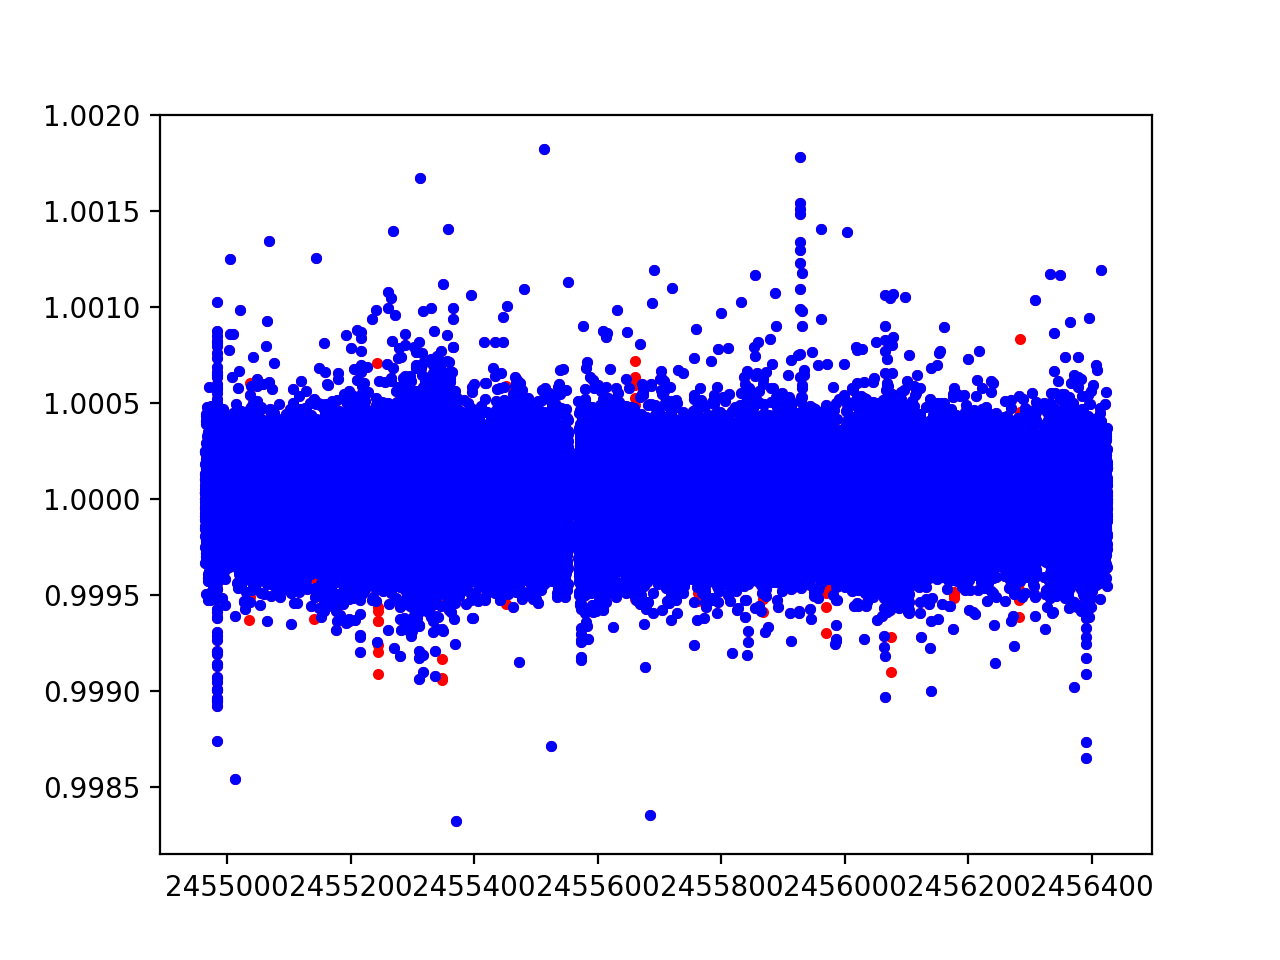

In [22]:

time_nt = cbs.time.copy()
flux_nt = cbs.flux.copy()
err_nt = cbs.err.copy()


for transit,dur in zip(ref_tts,ref_tds):
    tmin = transit - dur #bit of extra leeway here
    tmax = transit + 3*dur/4.
    cut = (time_nt>tmin) & (time_nt<tmax)
    time_nt, flux_nt, err_nt = time_nt[~cut], flux_nt[~cut], err_nt[~cut]

p.figure()
p.plot(cbs.time,cbs.flux,'r.')
p.plot(time_nt,flux_nt,'b.')

output = np.array([time_nt,flux_nt,err_nt]).T
np.savetxt('Lightcurves/K38_cln_noecl_notran.txt',output)


In [23]:
cbs = CBSearch.CBSearch(lcfilepath='Lightcurves/K38_cln_noecl_notran.txt')
#Load lightcurve


<IPython.core.display.Javascript object>


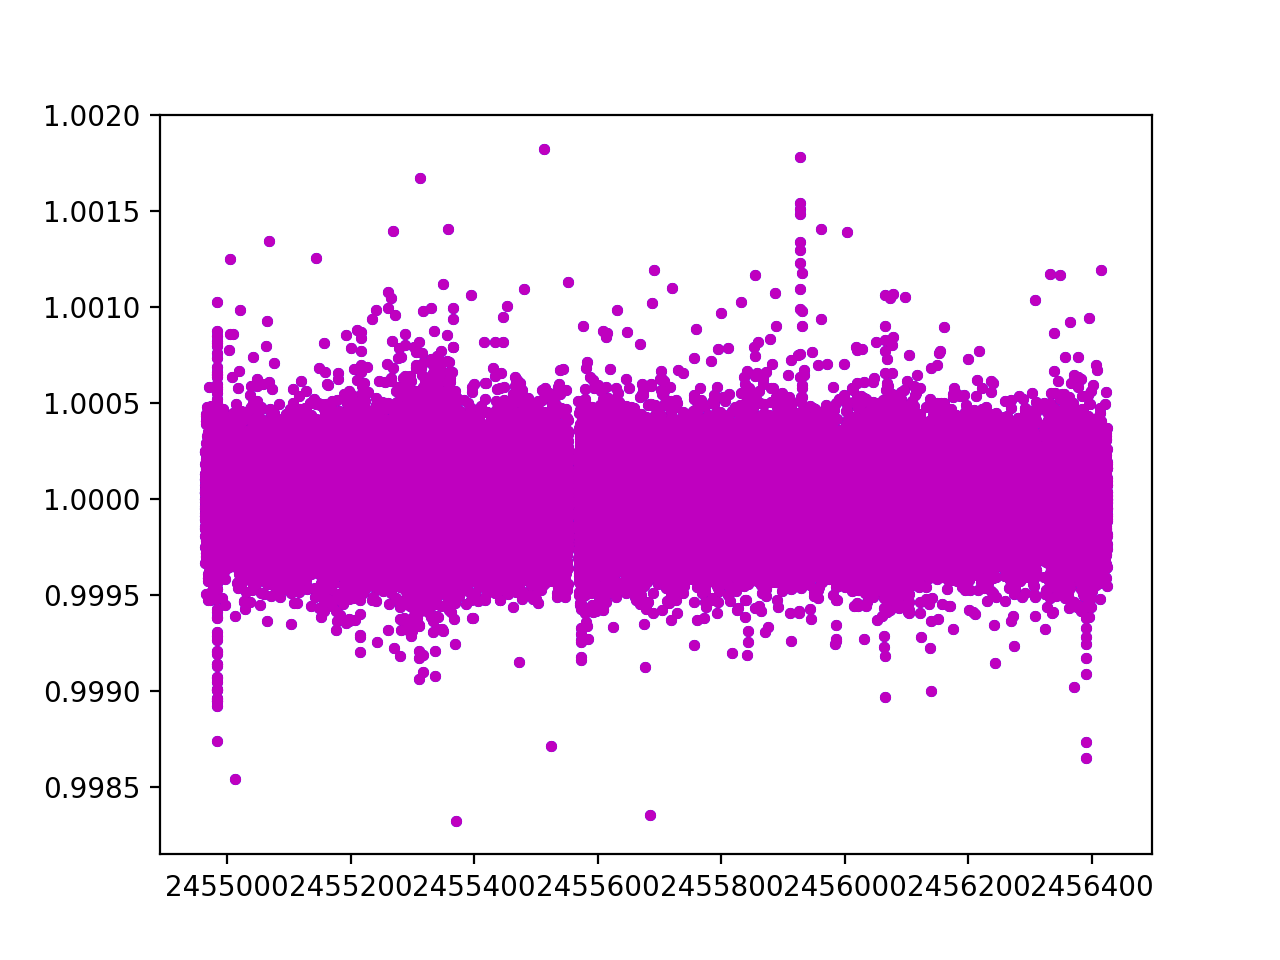

In [24]:
#try without K34b transits
#lc_notran = np.genfromtxt('Lightcurves/K34_cln_noecl_notran.txt')
#time_nt = lc_notran[:,0]
#flux_nt = lc_notran[:,1]
#err_nt = lc_notran[:,2]

p.figure()
p.plot(cbs.time,cbs.flux,'b.')
cbs.cut_outliers(thresh=15)
p.plot(cbs.time,cbs.flux,'m.')

#outlier cut
#cutidx = funcs.outlier_cut(time_nt,flux_nt,10, 250)
#time_nt_cut, flux_nt_cut = time_nt[cutidx],flux_nt[cutidx]
#time_nt_cut, flux_nt_cut = time_nt, flux_nt



In [25]:
# Kepler 38


cb = funcs.CBSystem(m1 = 0.949,f1 = 1., m2 = 0.2491, f2 = 0.0009081,
                     r1 = 1.757 * u.Rsun.to('au'), r2 = 0.27238 * u.Rsun.to('au'),
                     ab = 0.14694, eb = 0.1032, ib = np.deg2rad(89.446),
                     wb = np.deg2rad(268.68), fb = np.deg2rad(154.7856686),
                     mp = 0 * u.Mjup.to('Msun'), rp = 2.98 * u.Rearth.to('au'),
                     ap = 0.4644, ep = 0., ip = np.deg2rad(89.265),
                     wp = np.pi/2, fp = np.deg2rad(129.1698), Wp = np.deg2rad(0.1),
                     t0 = 2454970.0)

ab0 = cb.ab
mb0 = cb.m1 + cb.m2
p_p0 = (cb.ap**3/(cb.m1+cb.m2))**(1./2.)*365.25 #in days

fp0 = cb.fp
print(1/np.sqrt( (cb.m1+cb.m2)/cb.ab**3 )*365.25)
print(p_p0)

timing_precision = 30./86400./365.25 * (2*np.pi)  #in years/2pi

t = cbs.time


18.795493959724038
105.6043984677386


In [26]:
cbs.time[-1]-2455000

1424.001751112286

In [27]:
cbs.load_nbody(fpath1='Nbody/k38-0-nbody.pkl')


In [28]:
cbs.drop_unstable()



In [17]:
#cbs.drop_periods(ppcut=0.006)


In [29]:
cbs.make_lcstat()

#windows = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7]
#minpoints = 3
#blurfactor = 1.0
#window lightcurve with duration
#lcstat_nt = {}
#blurlcstat_nt = {}
#for win in windows:
#    lcstat_nt[win], blurlcstat_nt[win] = funcs.running_mean_gaps(time_nt_cut,flux_nt_cut-1,win,minpoints,blurfactor)
    
#blurlcstat_nt_norm = funcs.normalise_stat(blurlcstat_nt,lcstat_nt,window=250)

Statisticking
Normalising


<IPython.core.display.Javascript object>


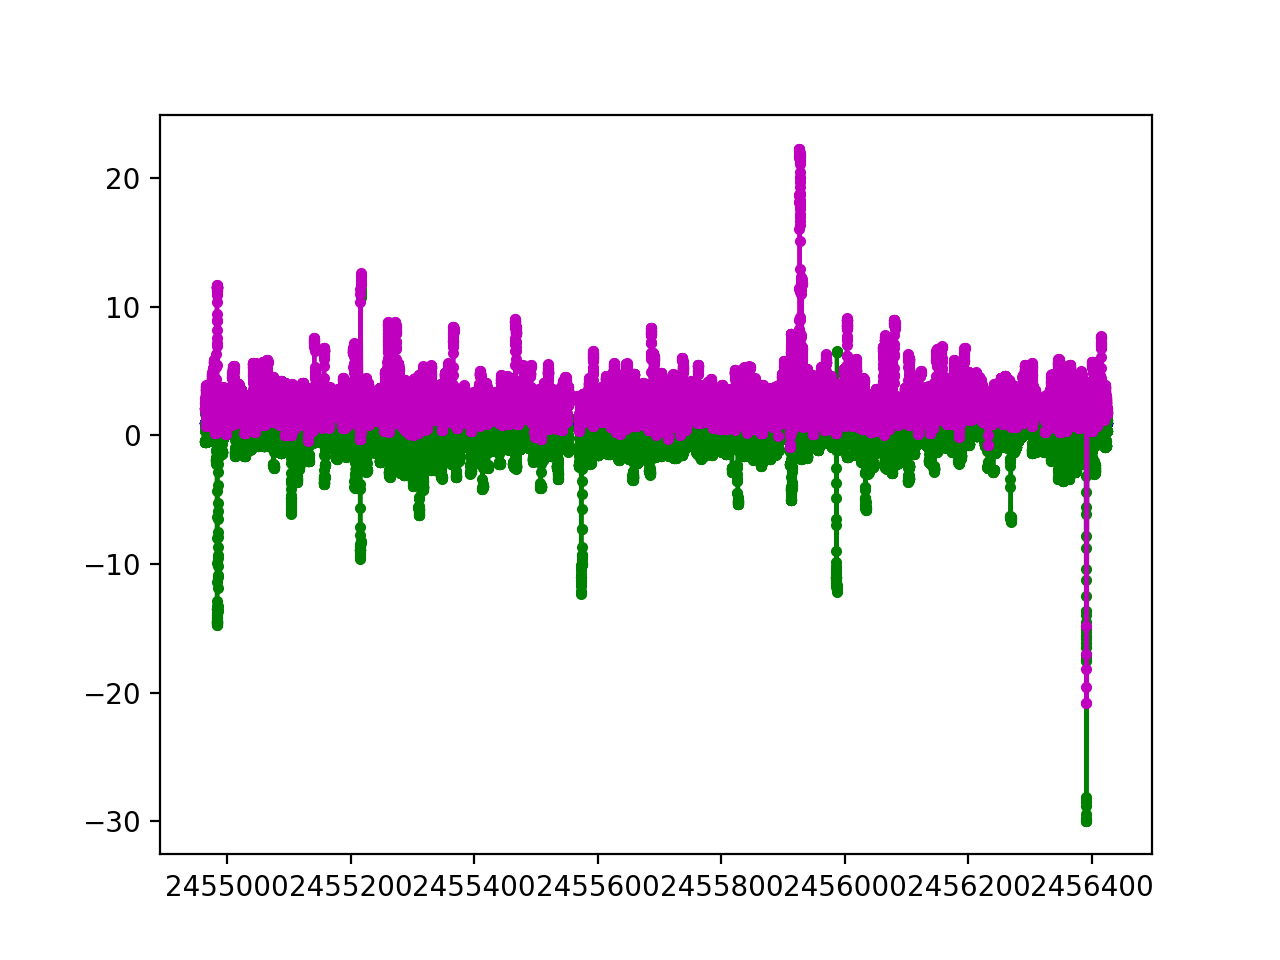

In [30]:

p.figure()
p.plot(cbs.time,cbs.flux,'b.')
p.plot(cbs.time,cbs.blurlcstat_norm[0.3],'g.-')
p.plot(cbs.time,cbs.blurantistat_norm[0.3],'m.-')



In [56]:
#periodogram_nt = funcs.make_periodogram(tts_all,tds_all,time_nt_cut,ppset_keys,fpset_keys,windows,blurlcstat_nt_norm)
#periodogram_nt_pt = funcs.make_periodogram_pertransit(tts_all,tds_all,time_nt_cut,ppset_keys,fpset_keys,windows,blurlcstat_nt_norm)
#periodogram_nt_2 = funcs.make_periodogram(tts_all_2,tds_all_2,time_nt_cut,ppset_2_keys,fpset_2_keys,windows,blurlcstat_nt_norm)
#periodogram_nt_pt_2 = funcs.make_periodogram_pertransit(tts_all_2,tds_all_2,time_nt_cut,ppset_2_keys,fpset_2_keys,windows,blurlcstat_nt_norm)

In [31]:
cbs.make_periodogram(prisec=False,pertransit=False, statistic=cbs.blurlcstat_norm)
#periodogram_nt_both = funcs.make_periodogram_prisec(tts_all,tts_all_2,tds_all,tds_all_2,time_nt_cut,ppset_keys,fpset_keys,windows,blurlcstat_nt_norm)

<IPython.core.display.Javascript object>


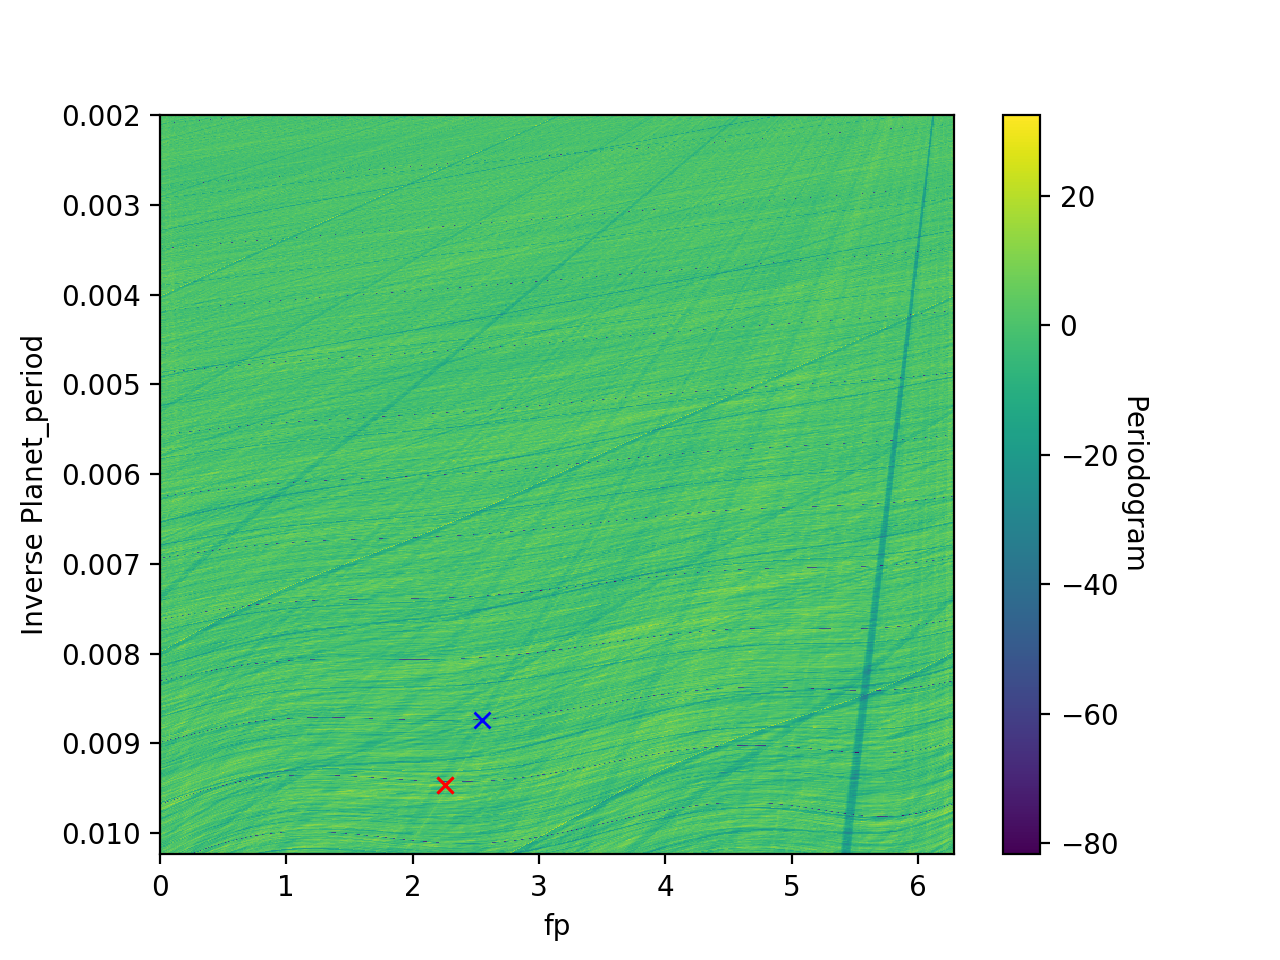

-81.69232722628759
-15.769431745998933


In [32]:
cbs.plot_static(fppp0=[fp0,p_p0])
p.plot(cb.fp,1./p_p0,'rx')


In [33]:
cbs.make_periodogram(prisec=False,pertransit=True, statistic=cbs.blurlcstat_norm)

<IPython.core.display.Javascript object>


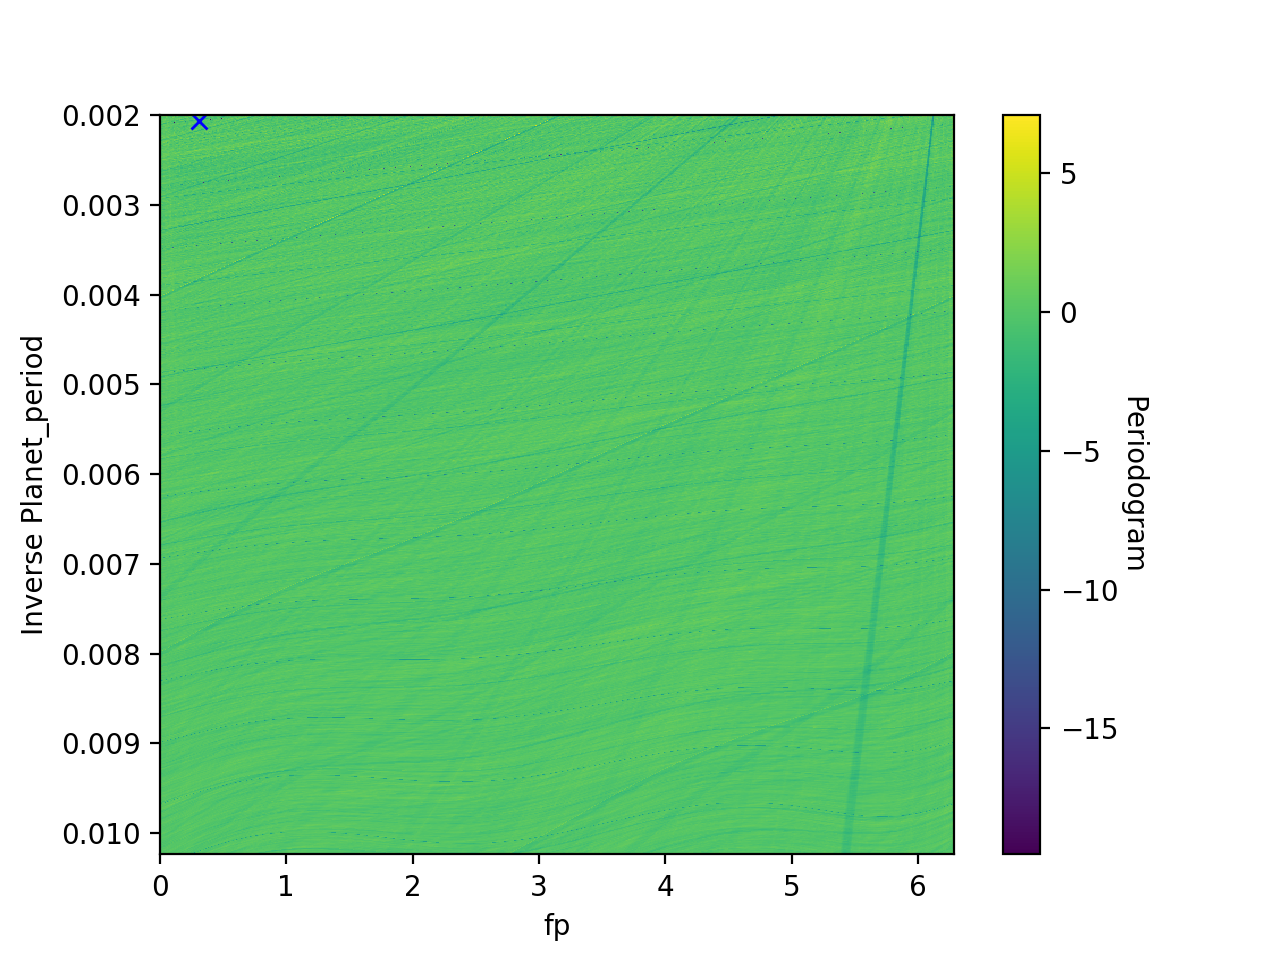

-19.549021002320924
-31.831317865248145


In [34]:
cbs.plot_static()

<IPython.core.display.Javascript object>


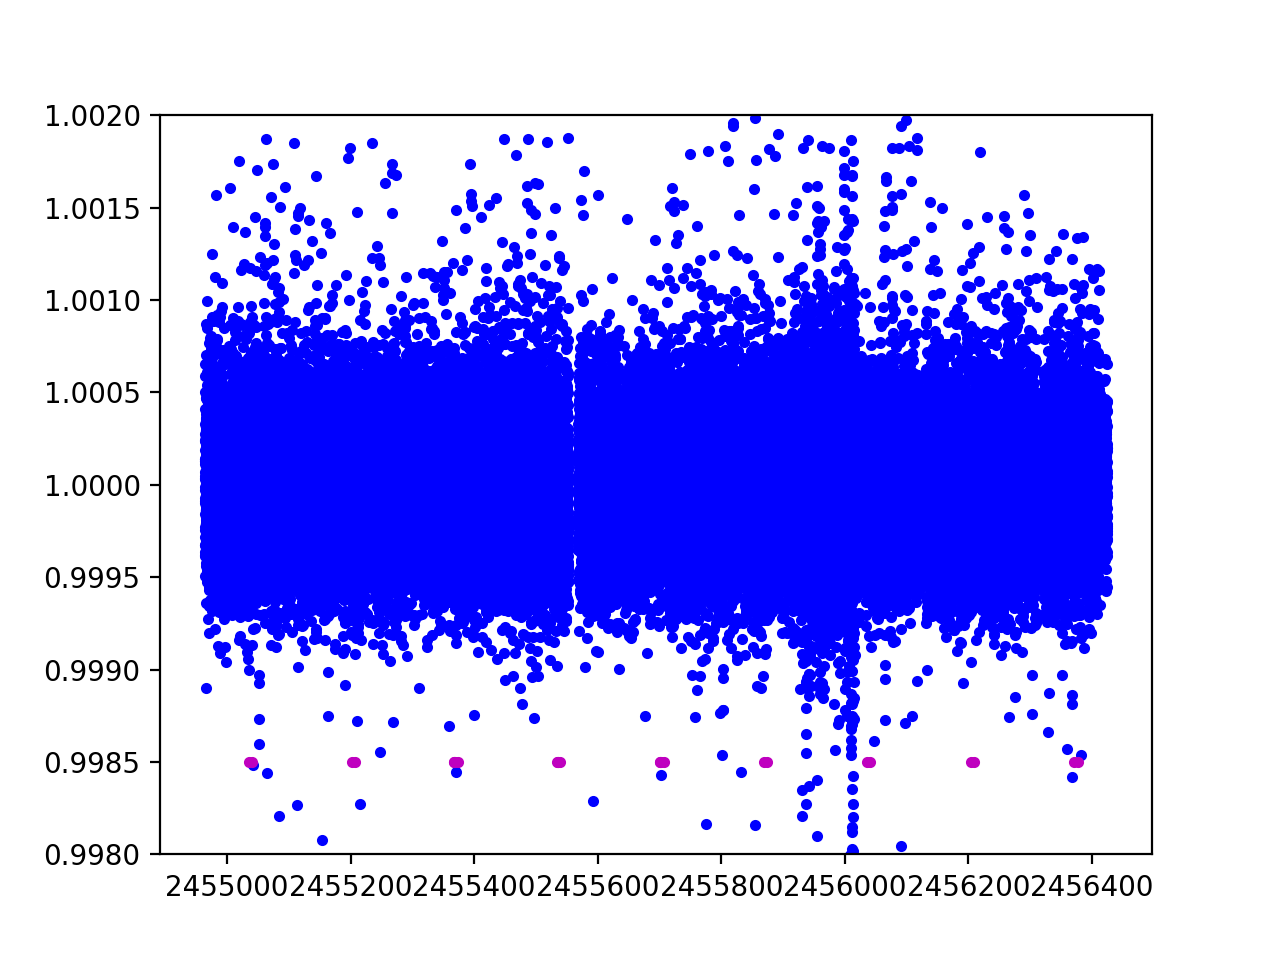

(0.998, 1.002)

In [54]:
p.figure()
p.plot(time_nt_cut,flux_nt_cut,'b.')
p.plot(time_nt_cut,lcstat_nt[0.3],'r.-')
p.plot(time_nt_cut,blurlcstat_nt[0.3],'g.-')

pp = ppset_keys[minidx_both[0]]
fp = fpset_keys[minidx_both[1]]
pp = ppset_keys[29]
fp = fpset_keys[572]


tts = tts_all[str(pp)[:6]][str(fp)[:6]]
tts = np.hstack((tts,tts_all_2[str(pp)[:6]][str(fp)[:6]]))
tds = tds_all[str(pp)[:6]][str(fp)[:6]]
tds = np.hstack((tds,tds_all_2[str(pp)[:6]][str(fp)[:6]]))

for transit,dur in zip(tts,tds):
    p.plot(transit,0.9985,'m.')
    #p.plot([transit-dur/2.,transit+dur/2.],[0.999,0.999])

p.ylim(0.998,1.002)

<IPython.core.display.Javascript object>


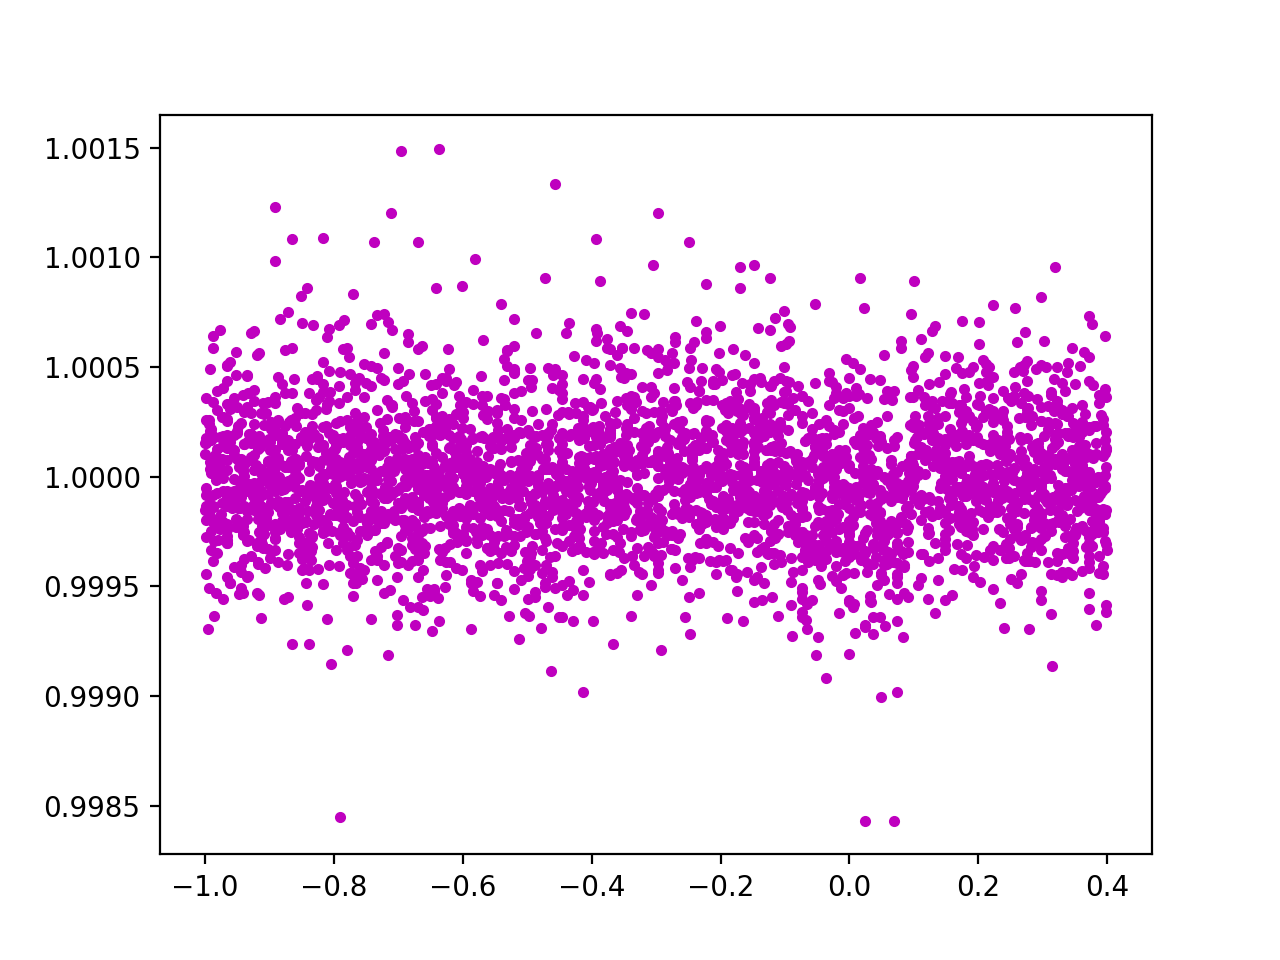

0.999883223636
451
0.00030888613636
8.02869206943


In [121]:
pp = ppset_keys[minidx_both[0]]
fp = fpset_keys[minidx_both[1]]
pp = ppset_keys[29]
fp = fpset_keys[572]

tts = tts_all[str(pp)[:6]][str(fp)[:6]]
tts = np.hstack((tts,tts_all_2[str(pp)[:6]][str(fp)[:6]]))
tds = tds_all[str(pp)[:6]][str(fp)[:6]]
tds = np.hstack((tds,tds_all_2[str(pp)[:6]][str(fp)[:6]]))
p.figure()
intransit = np.zeros(0)

for transit,dur in zip(tts,tds):
    #what's the window and blur window?
    blurfactor = 1. #1.5 means a 3 duration window is scanned
    minpoints = 3
    
    time_window, flux_window, timescale = funcs.extract_transit_window(transit,dur,time_nt_cut,
                                                                       flux_nt_cut,windows,
                                                                       minpoints,blurfactor) 
    start = np.searchsorted(timescale,-1/11.)
    end = np.searchsorted(timescale,1/11.)
    cut = np.searchsorted(timescale,0.4)
    intransit = np.hstack((intransit,flux_window[start:end]))

    if len(time_window)>0:
        p.plot(timescale[:cut],flux_window[:cut],'m.')
        #p.plot([-1/11.,-1/11.],[np.min(flux_window),np.max(flux_window)],'r--')
        #p.plot([1/11.,1/11.],[np.min(flux_window),np.max(flux_window)],'r--')

#print(intransit)
print(np.mean(intransit))
print(len(intransit))
print(np.std(intransit))
print((1-np.mean(intransit))/(np.std(intransit)/np.sqrt(len(intransit))))

<IPython.core.display.Javascript object>


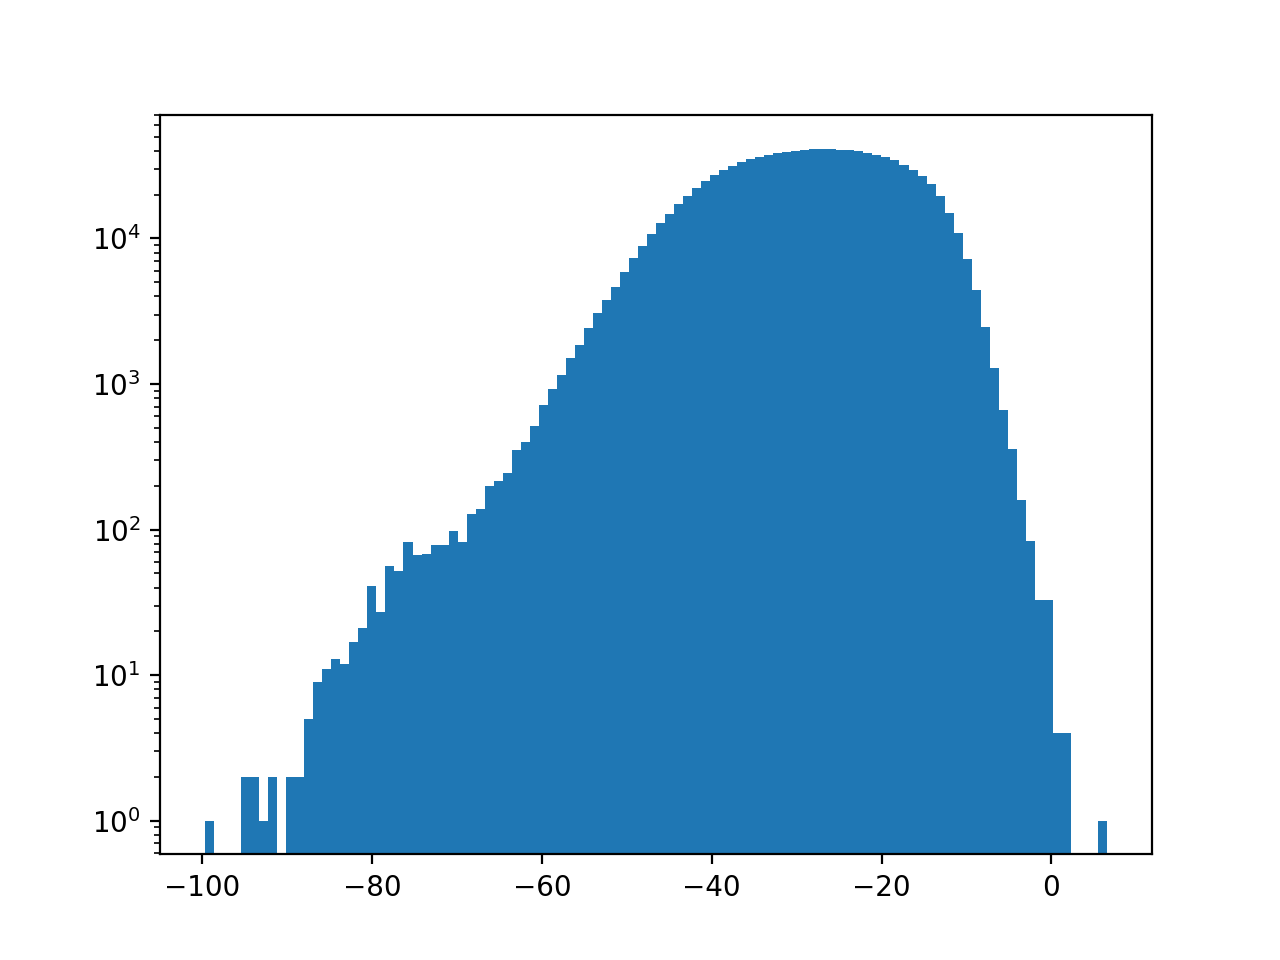

In [51]:
p.figure()
p.hist(periodogram_nt_both.flatten(),bins=100)
p.yscale('log', nonposy='clip')

In [122]:
cbs.plot_diag()

AttributeError: 'CBSearch' object has no attribute 'plot_diag'